# **1. Perkenalan Dataset**

Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

In [12]:
#Type your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

In [18]:
#Memuat dataaset menggunakan pandas
df = pd.read_csv('adult_income.csv')
df

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### 1. Struktur Data yang diamati

In [27]:
# Memahami Struktur Data yang digunakan 
# Meninjau jumlah baris, kolom tipe data dan jenis data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       48842 non-null  int64 
 1   age              48842 non-null  int64 
 2   workclass        48842 non-null  object
 3   fnlwgt           48842 non-null  int64 
 4   education        48842 non-null  object
 5   educational-num  48842 non-null  int64 
 6   marital-status   48842 non-null  object
 7   occupation       48842 non-null  object
 8   relationship     48842 non-null  object
 9   race             48842 non-null  object
 10  gender           48842 non-null  object
 11  capital-gain     48842 non-null  int64 
 12  capital-loss     48842 non-null  int64 
 13  hours-per-week   48842 non-null  int64 
 14  native-country   48842 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [39]:
numeric_features = df.select_dtypes(include=['number'])

In [40]:
categorical_features = df.select_dtypes(include=['object'])

Dataset ini terdiri dari 14 kolom dengan 48842 baris. Setiap kolom pada dataset ini memiliki nilai non-null sehingga sudah baik untuk ditangani lebih lanjut. Untuk tipe data sudah ada data dengan tipe numerikal (int64) dan tipe kategorikal (object)

### 2. Menangani Data yang Hilang

In [41]:
df.nunique()

Unnamed: 0         48842
age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
dtype: int64

In [29]:
# Melakukan pemeriksaan jumlah data yang hilang di setiap kolom
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

Dikarenakan dari hasil peninjauan tidak ditemukan data yang hilang maka langkah ini tidak dilakukan, tetapi jika ditemukan data yang hilang maka proses penanganan yang dapat dilakukan adalah dengan menghapus data yang hilang tersebut atau menggantinya dengan nilai yang sering muncul

### 3. Analisis Distribusi dan Korelasi

In [42]:
# Menampilkan statistik deskriptif dari dataset 
df.describe(include='all')

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
count,48842.000000,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842
unique,NaN,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42
top,NaN,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States
freq,NaN,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832
mean,24420.500000,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN
std,14099.615261,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN
min,0.000000,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN
25%,12210.250000,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
50%,24420.500000,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN
75%,36630.750000,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN


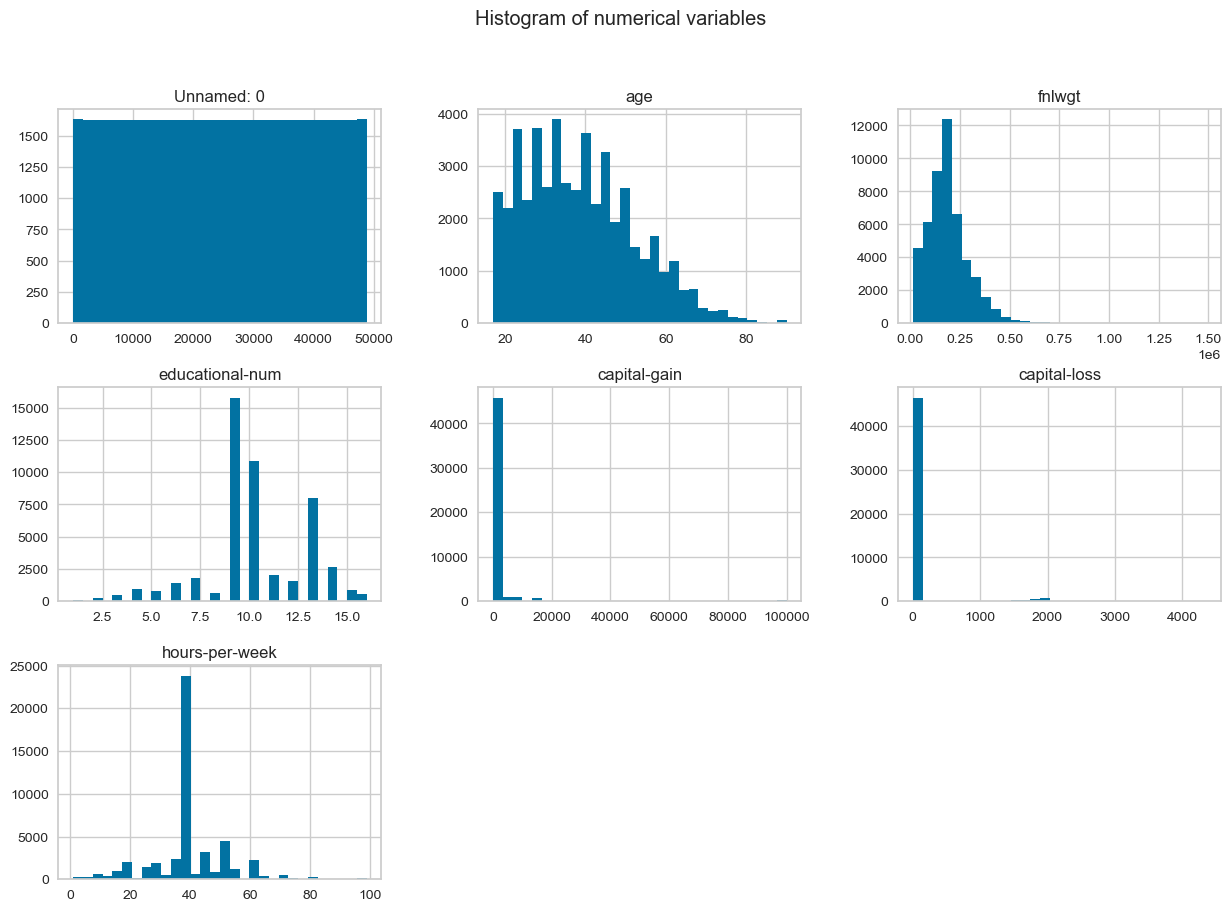

In [43]:
# Menampilkan histogram untuk distribusi frekuensi
df.hist(bins=30, figsize=(15,10))
plt.suptitle('Histogram of numerical variables')
plt.show()

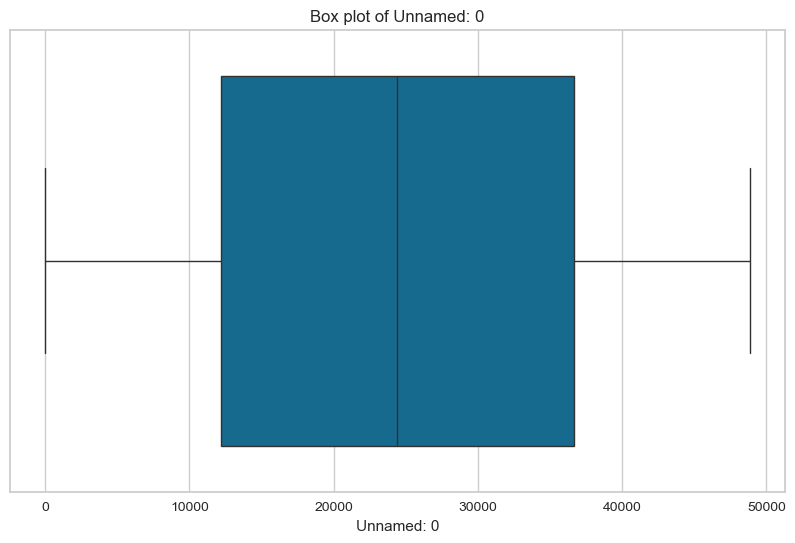

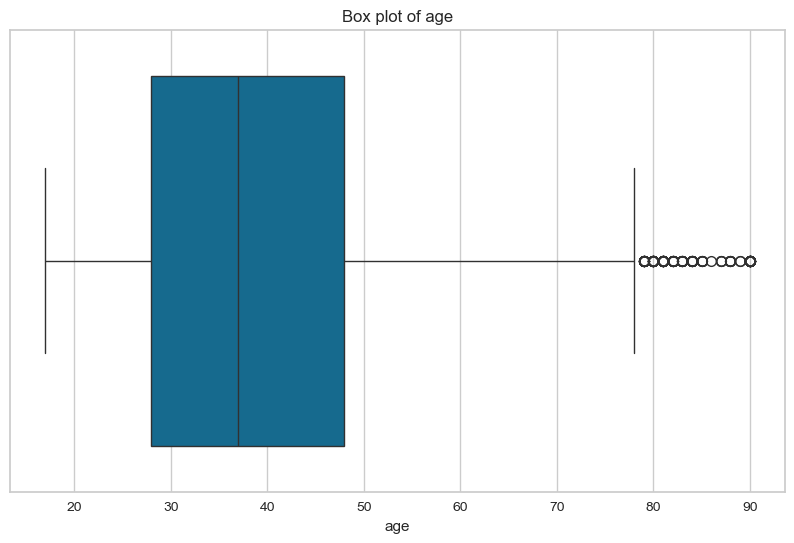

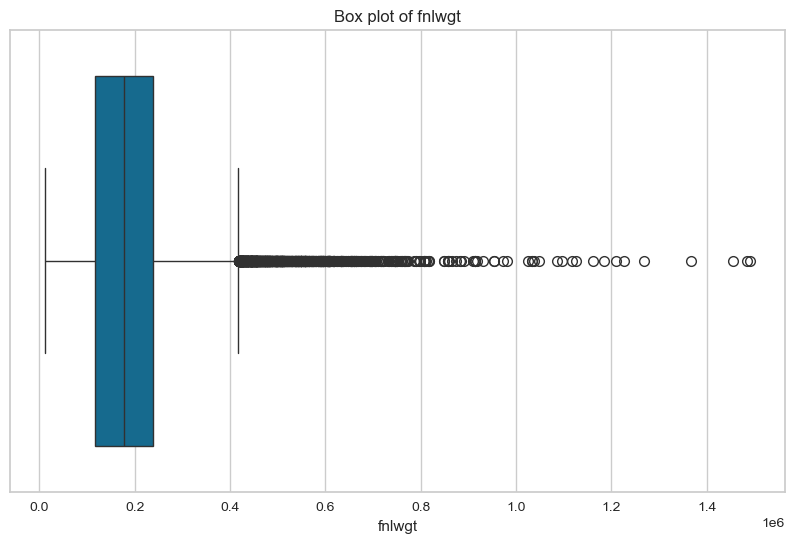

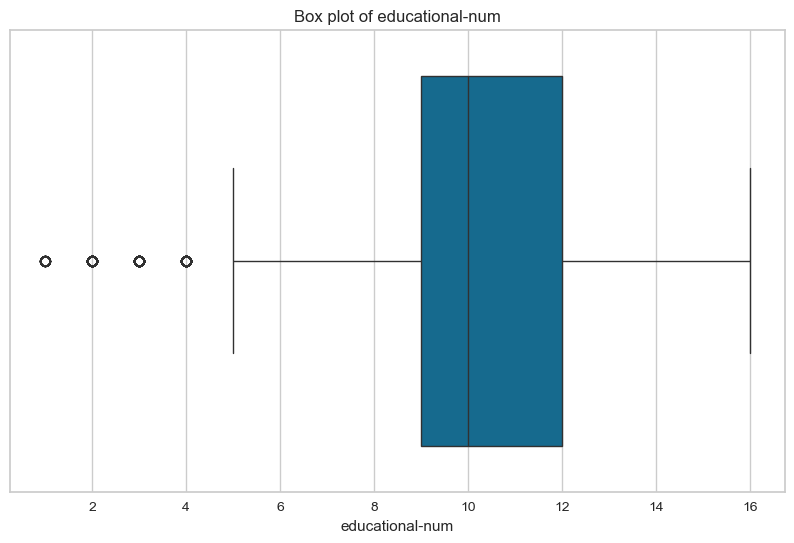

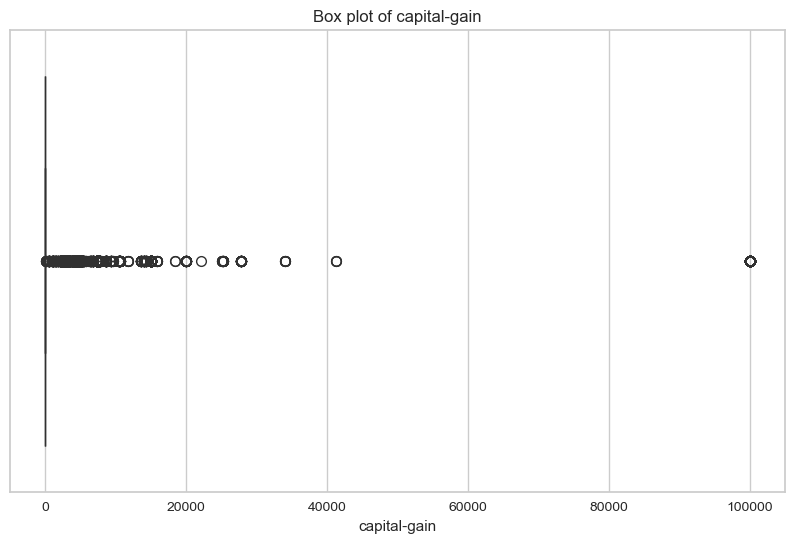

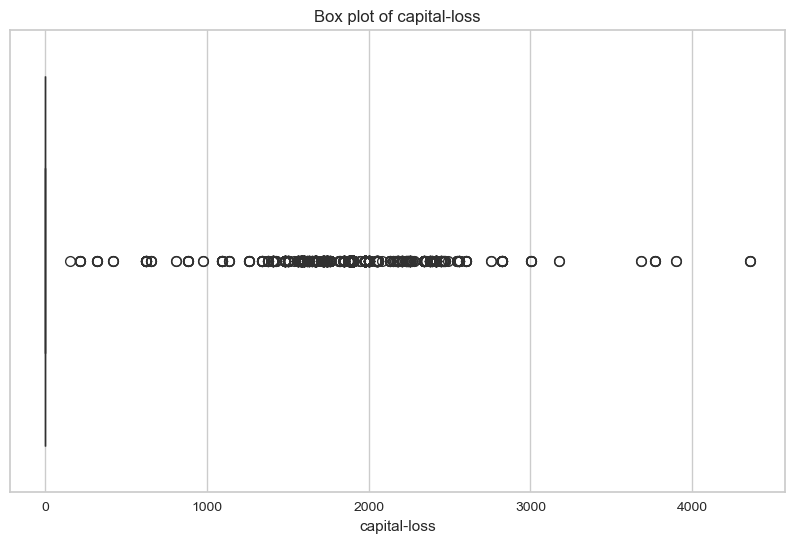

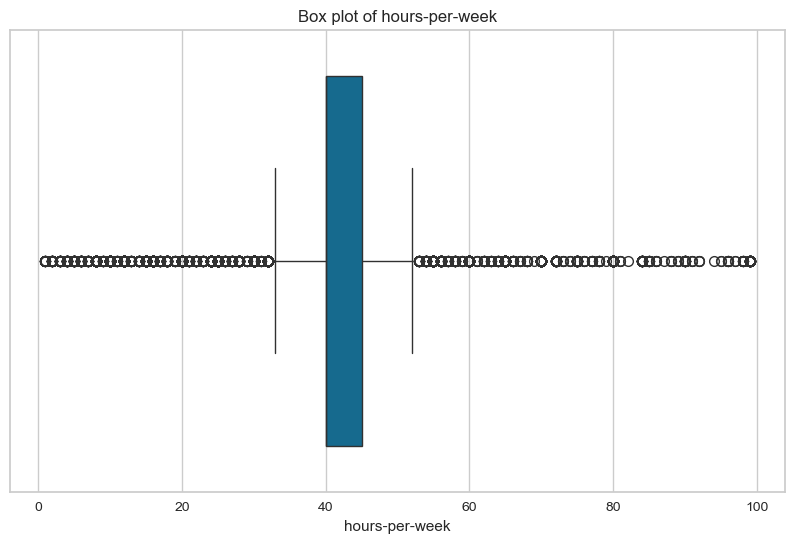

In [44]:
# Memeriksa Outlier
for feature in numeric_features: 
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

In [46]:
# Memeriksa hubungan variabel dengan menggunakan matriks korelasi
correlation_matrix = numeric_features.corr()
print(f'Correlation Matrix : {correlation_matrix}')

Correlation Matrix :                  Unnamed: 0       age    fnlwgt  educational-num  \
Unnamed: 0         1.000000 -0.003973  0.001435         0.001213   
age               -0.003973  1.000000 -0.076628         0.030940   
fnlwgt             0.001435 -0.076628  1.000000        -0.038761   
educational-num    0.001213  0.030940 -0.038761         1.000000   
capital-gain      -0.000532  0.077229 -0.003706         0.125146   
capital-loss      -0.001139  0.056944 -0.004366         0.080972   
hours-per-week     0.001497  0.071558 -0.013519         0.143689   

                 capital-gain  capital-loss  hours-per-week  
Unnamed: 0          -0.000532     -0.001139        0.001497  
age                  0.077229      0.056944        0.071558  
fnlwgt              -0.003706     -0.004366       -0.013519  
educational-num      0.125146      0.080972        0.143689  
capital-gain         1.000000     -0.031441        0.082157  
capital-loss        -0.031441      1.000000        0.054467  


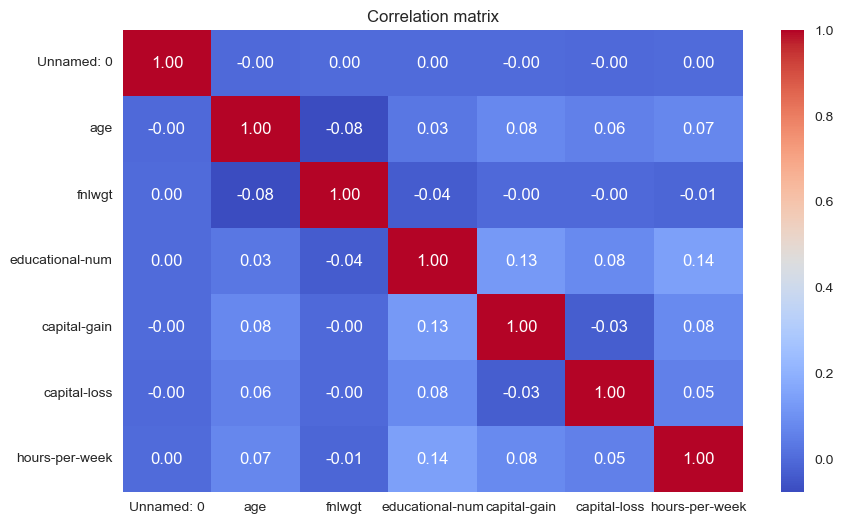

In [49]:
# Visualisasi matriks korelasi menggunakan heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix')
plt.show()

Hasil menunjukkan berbagai hasil analisis distribusi frekuensi sesuai dengan hasil yang ada. Temuan lainnya ialah korelasi antara setiap variabel yang mana dapat di lihat pada matrix korelasi yang dapat disimpulkan bahwa hubungan antar setiap variabel memiliki nilai yang lemah hingga sangat lemah sekitar <= 0.1 

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
#Type your code here

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
#Type your code here

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

Data baru telah berhasil disimpan!
